In [91]:
import pandas as pd
import sys
import os

In [92]:
sys.path.append(os.path.abspath("../data"))


In [93]:
data = pd.read_csv("../data/raw/store.csv")

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [95]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [96]:
print(data.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [97]:
data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [98]:
data['CompetitionDistance'] = data['CompetitionDistance'].fillna(data['CompetitionDistance'].median())

In [99]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [100]:
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].fillna(0)
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].fillna(0)

In [101]:
data['Promo2SinceWeek']=data['Promo2SinceWeek'].fillna(0)
data['Promo2SinceYear']=data['Promo2SinceYear'].fillna(0).infer_objects(copy=False)
data['PromoInterval']=data['PromoInterval'].fillna('None').infer_objects(copy=False)

In [102]:
data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,None
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,None


In [103]:
print(data.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [104]:
data = pd.get_dummies(data, columns=['StoreType', 'Assortment'], drop_first=True)

In [105]:
promo_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in promo_months:
    data[f'Promo_{month}'] = data['PromoInterval'].apply(lambda x: 1 if month in str(x) else 0)
data.drop('PromoInterval', axis=1, inplace=True)


In [106]:
data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sep,Promo_Oct,Promo_Nov,Promo_Dec
0,1,1270.0,9.0,2008.0,0,0.0,0.0,False,True,False,...,0,0,0,0,0,0,0,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,False,False,False,...,0,1,0,0,1,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,False,False,False,...,0,1,0,0,1,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,False,True,False,...,0,0,0,0,0,0,0,0,0,0
4,5,29910.0,4.0,2015.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,False,False,False,...,0,1,0,0,1,0,0,1,0,0
1111,1112,1880.0,4.0,2006.0,0,0.0,0.0,False,True,False,...,0,0,0,0,0,0,0,0,0,0
1112,1113,9260.0,0.0,0.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1113,1114,870.0,0.0,0.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [107]:
import datetime
current_year = datetime.datetime.now().year
current_month = datetime.datetime.now().month

data['CompetitionDurationMonths'] = ((current_year - data['CompetitionOpenSinceYear']) * 12 
                                     + (current_month - data['CompetitionOpenSinceMonth']))
# Modified code
data['CompetitionDurationMonths'] = data['CompetitionDurationMonths'].clip(lower=0)

In [112]:
print(data.isnull().sum())


Store                        0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_b                 0
Assortment_c                 0
Promo_Jan                    0
Promo_Feb                    0
Promo_Mar                    0
Promo_Apr                    0
Promo_May                    0
Promo_Jun                    0
Promo_Jul                    0
Promo_Aug                    0
Promo_Sep                    0
Promo_Oct                    0
Promo_Nov                    0
Promo_Dec                    0
CompetitionDurationMonths    0
dtype: int64


In [113]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr',
       'Promo_May', 'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sep',
       'Promo_Oct', 'Promo_Nov', 'Promo_Dec', 'CompetitionDurationMonths'],
      dtype='object')


In [116]:
def detect_outliers(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify rows with outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

    return outlier_summary


NameError: name 'outlier_summary' is not defined

In [117]:
outliers = detect_outliers(data, numerical_cols)
print("Outlier counts for each numerical column:")
print(outliers)


Outlier counts for each numerical column:
{'Store': 0, 'CompetitionDistance': 108, 'CompetitionOpenSinceMonth': 0, 'CompetitionOpenSinceYear': 0, 'Promo2': 0, 'Promo2SinceWeek': 0, 'Promo2SinceYear': 0, 'Promo_Jan': 0, 'Promo_Feb': 130, 'Promo_Mar': 106, 'Promo_Apr': 0, 'Promo_May': 130, 'Promo_Jun': 106, 'Promo_Jul': 0, 'Promo_Aug': 130, 'Promo_Sep': 106, 'Promo_Oct': 0, 'Promo_Nov': 130, 'Promo_Dec': 106, 'CompetitionDurationMonths': 0}


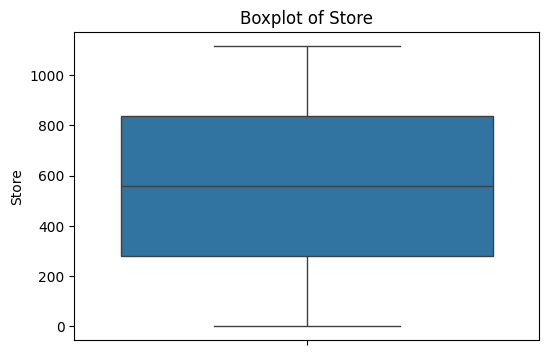

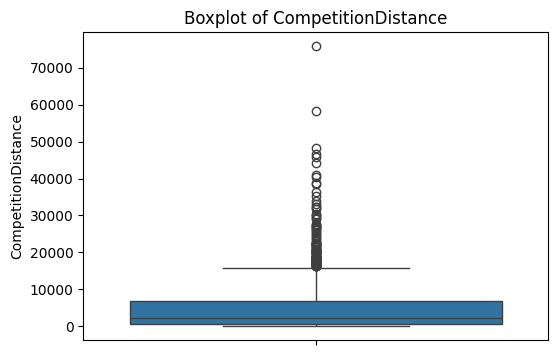

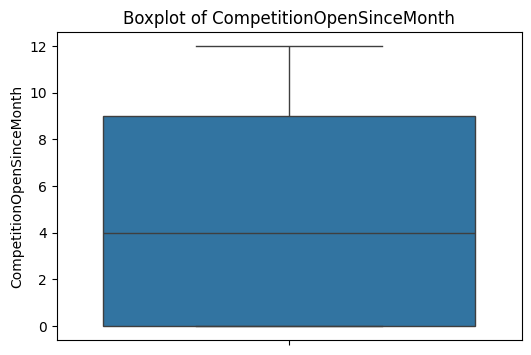

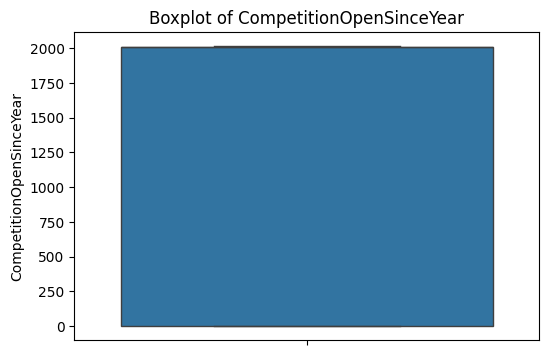

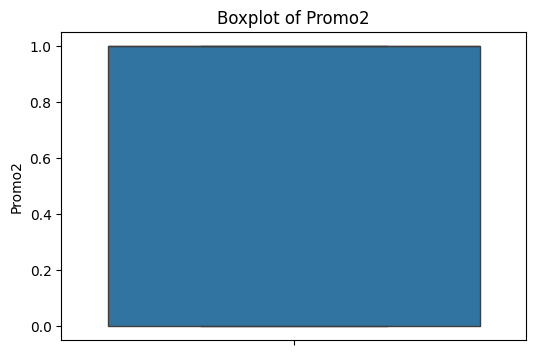

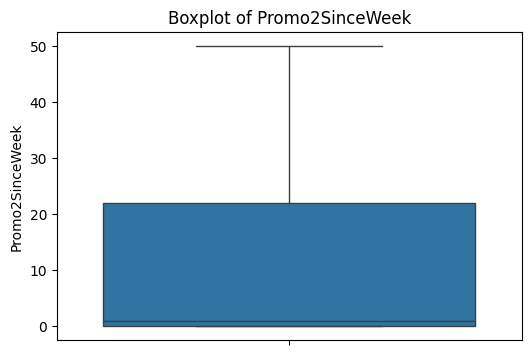

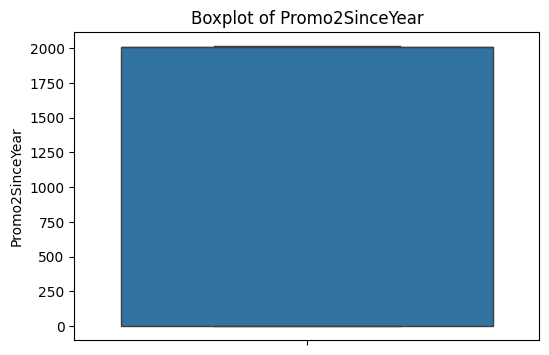

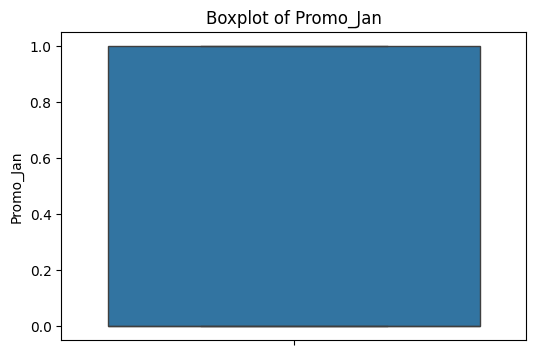

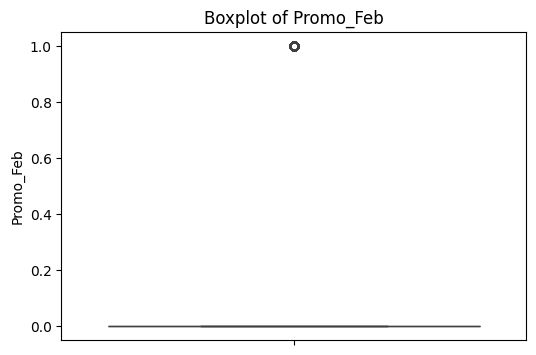

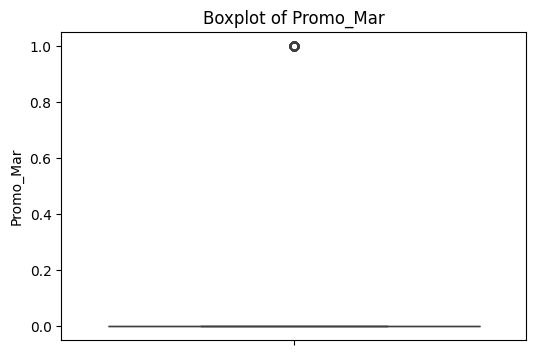

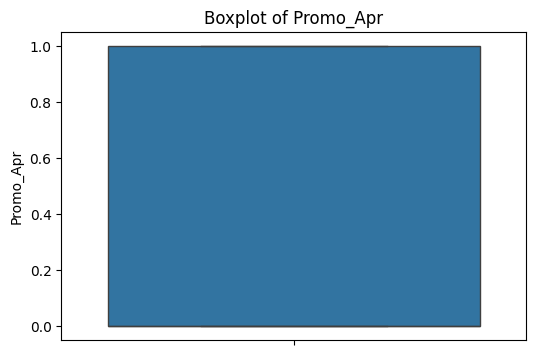

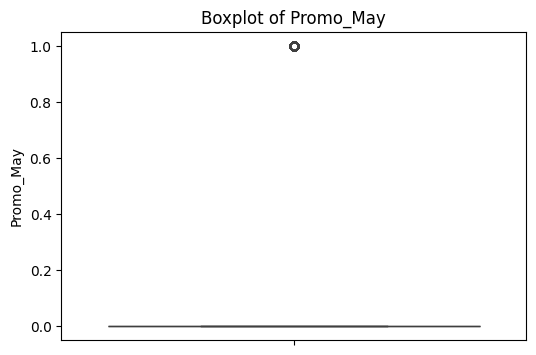

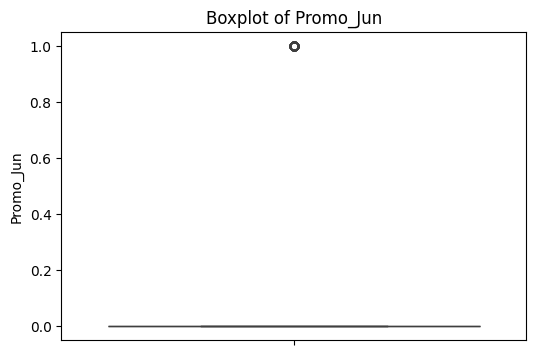

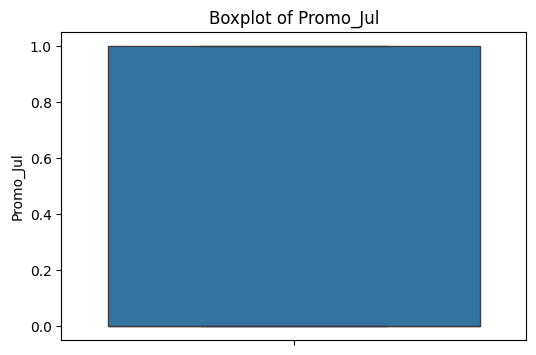

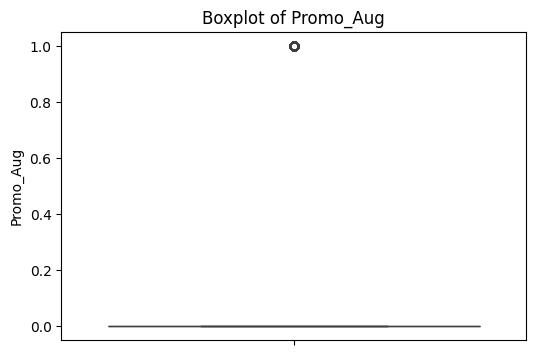

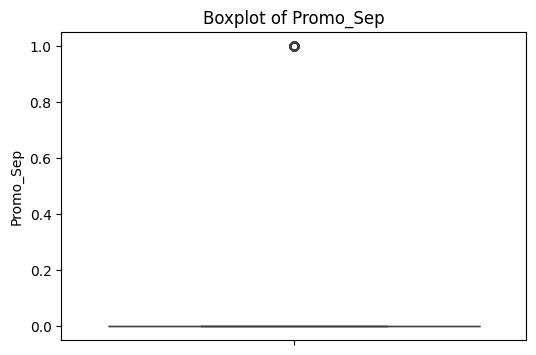

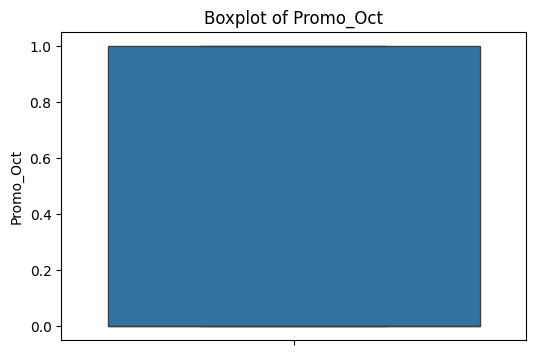

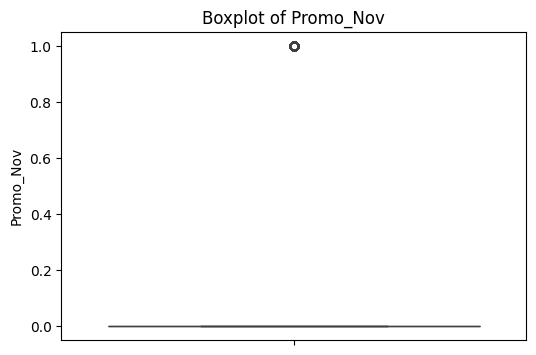

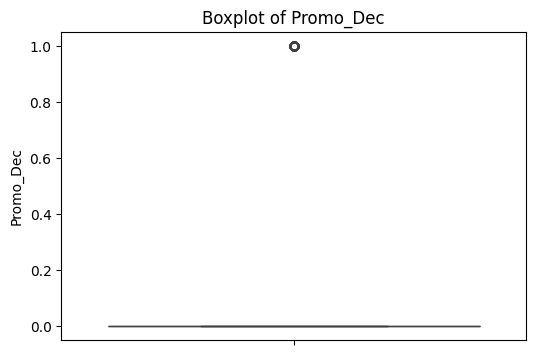

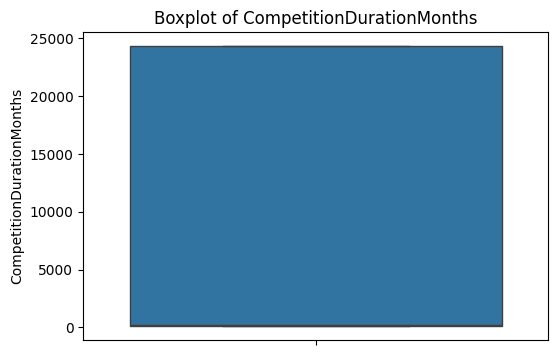

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [121]:
print(data[['Promo_Feb', 'Promo_Mar']].describe())

         Promo_Feb    Promo_Mar
count  1115.000000  1115.000000
mean      0.116592     0.095067
std       0.321077     0.293439
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       0.000000     0.000000
max       1.000000     1.000000


In [128]:
outliers_distance = data[data['CompetitionDistance'] > data['CompetitionDistance'].quantile(0.99)]
outliers_distance


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,...,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sep,Promo_Oct,Promo_Nov,Promo_Dec,CompetitionDurationMonths
109,110,34959.708,4.0,2013.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,141.0
121,122,34959.708,4.0,2013.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,141.0
298,299,34959.708,9.0,2012.0,0,0.0,0.0,False,False,True,...,0,0,0,0,0,0,0,0,0,148.0
314,315,34959.708,4.0,2013.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,141.0
452,453,34959.708,0.0,0.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,24301.0
461,462,34959.708,8.0,2008.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,197.0
523,524,34959.708,9.0,2013.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,136.0
725,726,34959.708,2.0,2002.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,275.0
731,732,34959.708,0.0,0.0,0,0.0,0.0,False,False,False,...,0,0,0,0,0,0,0,0,0,24301.0
746,747,34959.708,8.0,2008.0,0,0.0,0.0,False,True,False,...,0,0,0,0,0,0,0,0,0,197.0


In [131]:
import numpy as np
data['CompetitionDistance'] = np.log1p(data['CompetitionDistance'])


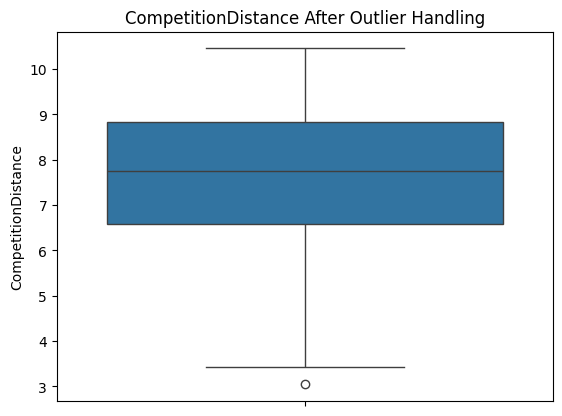

In [132]:
sns.boxplot(data['CompetitionDistance'])
plt.title('CompetitionDistance After Outlier Handling')
plt.show()


In [136]:
data.to_csv('../data/processed/store_processed.csv', index=False)